In [1]:
from stock_lstm_model import create_model
from data import retrieve_stock_data, format_timeseries_dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error
import yfinance as yf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import numpy as np

2025-02-18 15:40:51.867172: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-18 15:40:52.033683: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739904052.119892  456279 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739904052.139007  456279 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-18 15:40:52.272348: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)

In [3]:
TICKER = 'PETR4.SA'
data = retrieve_stock_data(TICKER, '2018-01-01')

[*********************100%***********************]  1 of 1 completed


# Dados históricos brutos

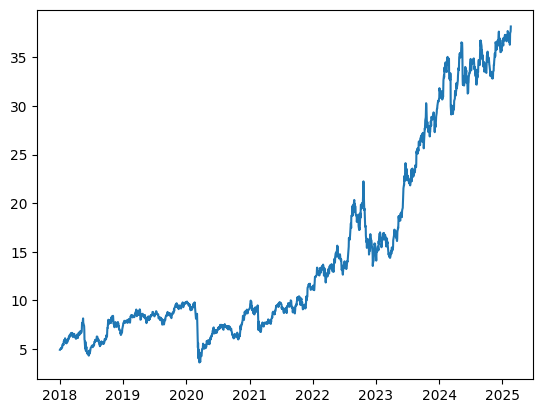

In [4]:
plt.plot(data)
plt.show()

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)

In [6]:
train_data, test_data = train_test_split(scaled_data, test_size=0.3, random_state=1, shuffle=False)

In [7]:
parameters = {"batch_size": 47, 
          "epochs": 300, 
          "loopback": 14, 
          "learning_rate": 0.0006,
          "units": 50,
          "dropout_rate": 0.01}
            
X_train, y_train = format_timeseries_dataset(train_data, parameters["loopback"])
X_test, y_test = format_timeseries_dataset(test_data, parameters["loopback"])

model = create_model(learning_rate=parameters["learning_rate"], units=parameters["units"], 
                        dropout_rate=float(parameters["dropout_rate"]))
model_history = model.fit(X_train, y_train, epochs=parameters["epochs"], batch_size=parameters["batch_size"], 
            validation_data=(X_test, y_test), shuffle=False)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

2025-02-18 15:40:58.997209: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0074 - mae: 0.0778 - val_loss: 0.0635 - val_mae: 0.2252
Epoch 2/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0143 - mae: 0.1098 - val_loss: 0.1176 - val_mae: 0.3243
Epoch 3/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0018 - mae: 0.0365 - val_loss: 0.0284 - val_mae: 0.1563
Epoch 4/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0021 - mae: 0.0414 - val_loss: 0.0053 - val_mae: 0.0651
Epoch 5/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.2952e-04 - mae: 0.0245 - val_loss: 0.0034 - val_mae: 0.0458
Epoch 6/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.6223e-04 - mae: 0.0103 - val_loss: 0.0058 - val_mae: 0.0623
Epoch 7/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.6157e-04 - mae: 0.0112 - val_loss: 0.0033 - val_mae: 0.0452
Epoch 8/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.2489e-04 - mae: 0.0126 - val_loss: 0.0034 - val_mae: 0.0461
Epoch 9/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0

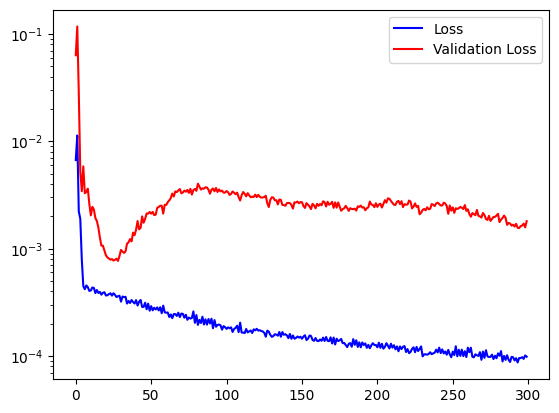

In [8]:
plt.plot(model_history.history['loss'], c='b', label='Loss')
plt.plot(model_history.history['val_loss'], c='r', label='Validation Loss')
plt.yscale('log')
plt.legend()
plt.show()

In [9]:
print("MSE: ", mse, " RMSE:", rmse, " MAPE: ",mape)

MSE:  0.0018019203943150594  RMSE: 0.04244903290199977  MAPE:  0.04557873691075217
